In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics 
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [2]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


In [6]:
import csv

In [10]:
data=pd.read_csv('weather.csv')

In [11]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [12]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [14]:
data.shape

(366, 22)

In [15]:
data.duplicated().sum()

0

In [16]:
data.nunique()

MinTemp          180
MaxTemp          187
Rainfall          47
Evaporation       55
Sunshine         114
WindGustDir       16
WindGustSpeed     35
WindDir9am        16
WindDir3pm        16
WindSpeed9am      22
WindSpeed3pm      26
Humidity9am       60
Humidity3pm       74
Pressure9am      190
Pressure3pm      193
Cloud9am           9
Cloud3pm           9
Temp9am          178
Temp3pm          200
RainToday          2
RISK_MM           47
RainTomorrow       2
dtype: int64

In [17]:
#target count

data.RainTomorrow.value_counts()

No     300
Yes     66
Name: RainTomorrow, dtype: int64

In [18]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

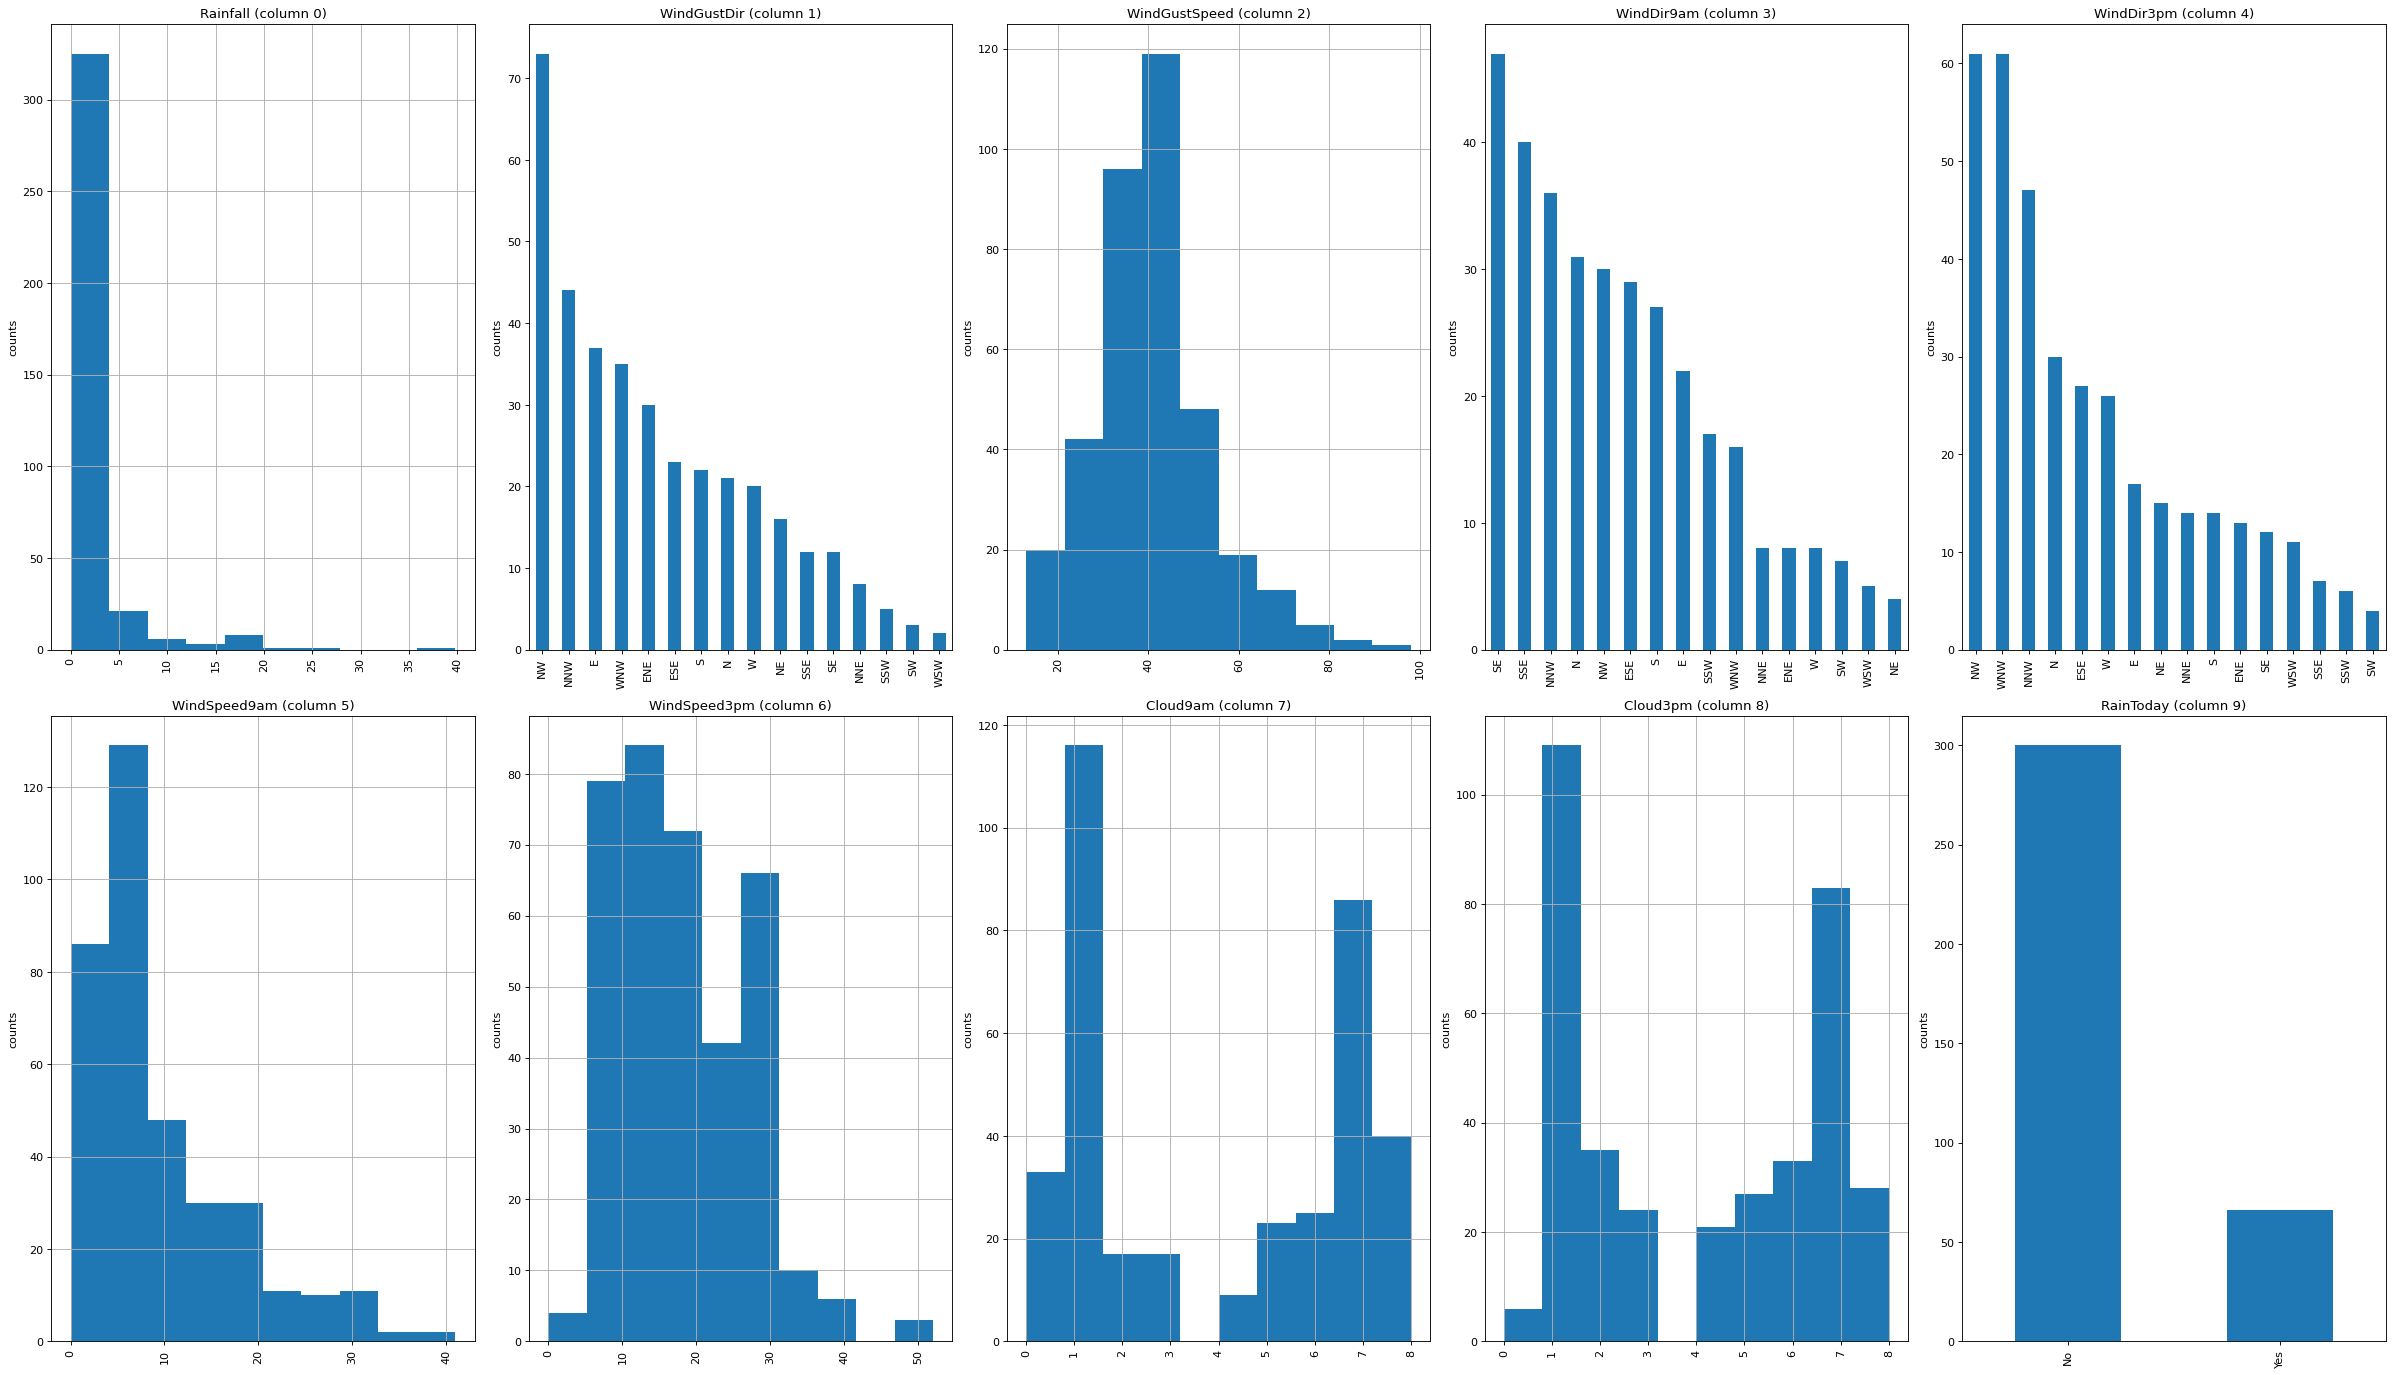

In [19]:
plotPerColumnDistribution(data, 10, 5)

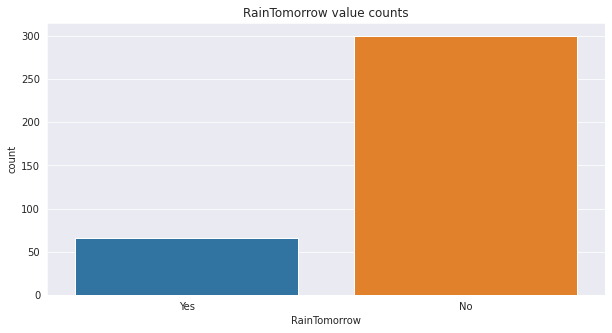

In [20]:

plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=data["RainTomorrow"]);

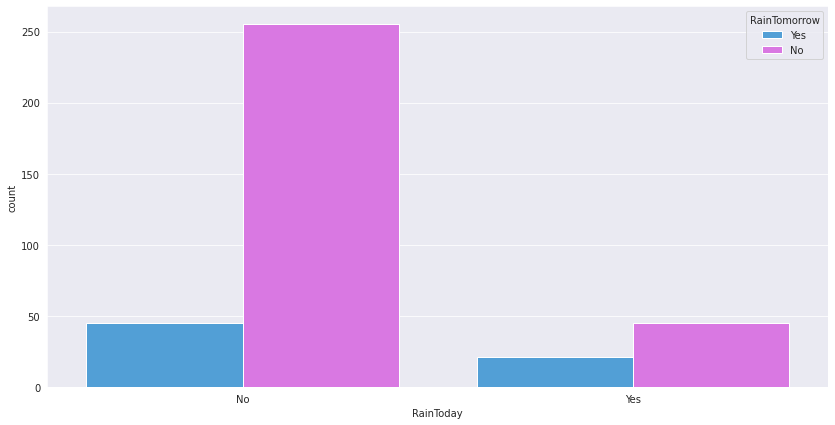

In [21]:
plt.figure(figsize=(14,7))
sns.countplot(x=data["RainToday"], hue=data["RainTomorrow"], palette=sns.color_palette("husl")[4:]);

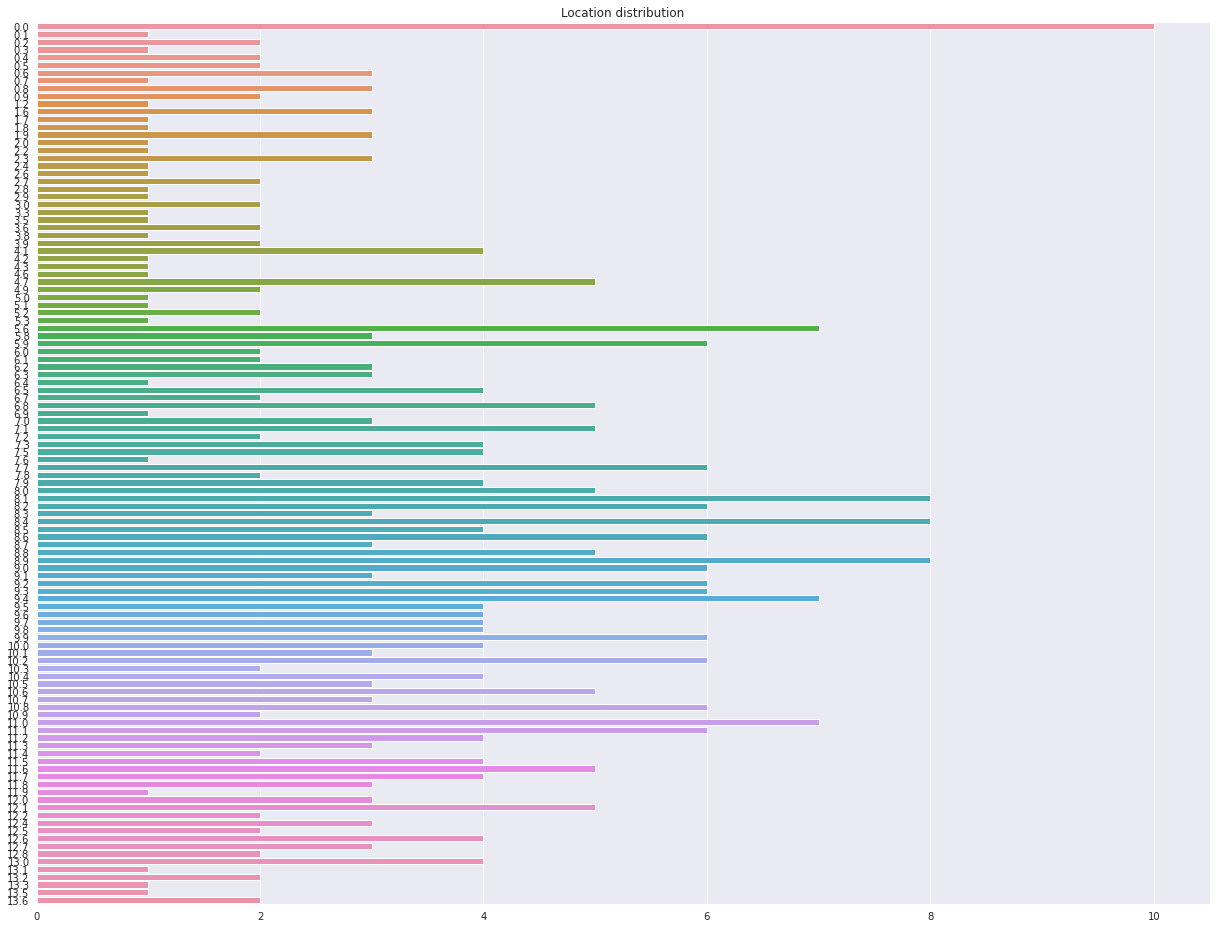

In [26]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Sunshine')

plt.title('Location distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

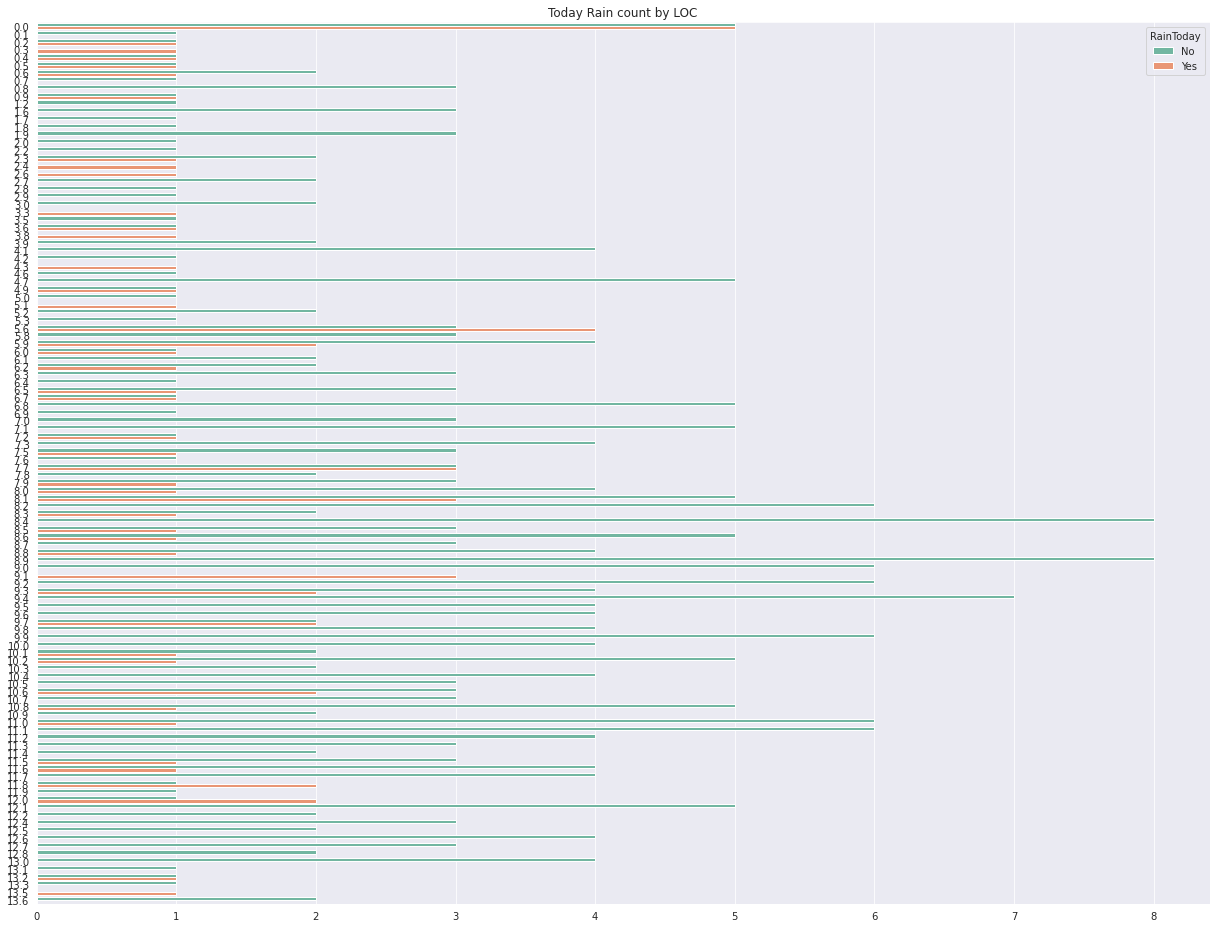

In [28]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Sunshine', hue="RainToday", palette=sns.color_palette("Set2"))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

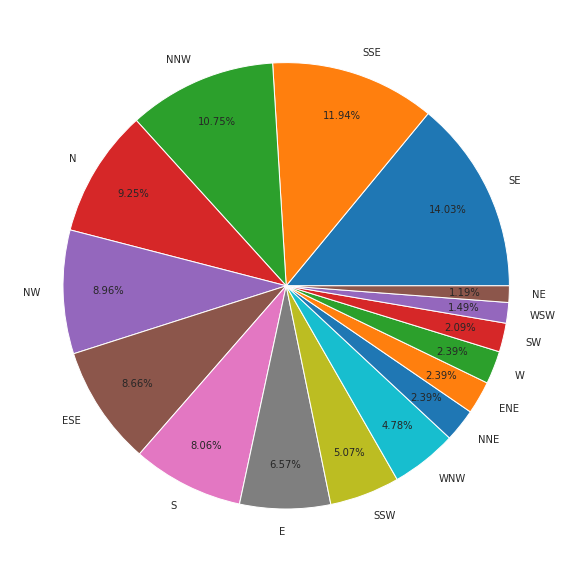

In [29]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir9am"].value_counts(),
        labels=list(data["WindDir9am"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

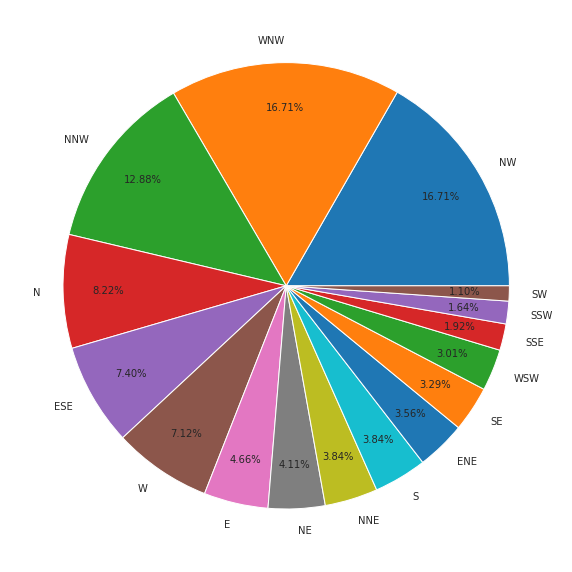

In [30]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir3pm"].value_counts(),
        labels=list(data["WindDir3pm"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

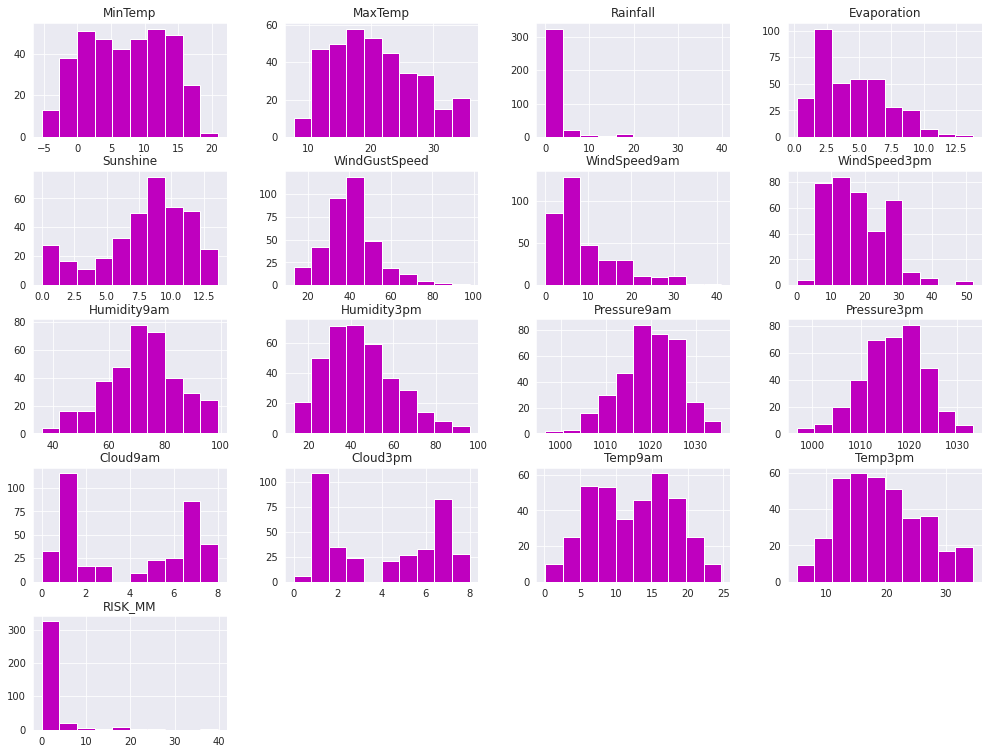

In [31]:
data.hist(figsize=(17,13), color="m");

In [32]:
df_preprocessed = data.copy()

In [33]:
df_preprocessed.isnull().mean() * 100

MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.819672
WindGustDir      0.819672
WindGustSpeed    0.546448
WindDir9am       8.469945
WindDir3pm       0.273224
WindSpeed9am     1.912568
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

In [34]:
mean = df_preprocessed.mean()
df_preprocessed.fillna(mean, inplace=True)

df_preprocessed.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       3
WindGustSpeed     0
WindDir9am       31
WindDir3pm        1
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [35]:
df_preprocessed.replace(np.nan, 'NaN', inplace=True)
df_preprocessed.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [36]:
df_preprocessed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [38]:
df_preprocessed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [41]:
df_preprocessed['Rainfall'] = pd.to_datetime(df_preprocessed['Rainfall'])

In [42]:
#columns segregation
date_columns = ['Date']
cat_columns = df_preprocessed.select_dtypes(include=['object']).columns
num_columns = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns
target_col = 'RainTomorrow'

In [43]:
cat_columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [44]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [46]:
data_cat = data[['Rainfall','RainToday','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]

In [47]:
data_cat = imp_mode.fit_transform(data_cat)

In [48]:
for i in cat_columns:
    print('Unique Values in ' + i + ' Column:', end = " ")
    print(len(df_preprocessed[i].unique()))
    print('-----------------------------------------------------')

Unique Values in WindGustDir Column: 17
-----------------------------------------------------
Unique Values in WindDir9am Column: 17
-----------------------------------------------------
Unique Values in WindDir3pm Column: 17
-----------------------------------------------------
Unique Values in RainToday Column: 2
-----------------------------------------------------
Unique Values in RainTomorrow Column: 2
-----------------------------------------------------


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Rainfall','WindGustDir','WindDir9am','WindDir3pm']:
    df_preprocessed[i] = le.fit_transform(df_preprocessed[i])
df_preprocessed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0,3.4,6.3,7,30.0,13,7,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3,4.4,9.7,1,39.0,0,14,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3,5.8,3.3,7,85.0,3,5,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,21,7.2,9.1,7,54.0,15,14,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2,5.6,10.6,11,50.0,11,2,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [50]:
df_preprocessed[['RainToday']].value_counts()

RainToday
No           300
Yes           66
dtype: int64

In [51]:
df_preprocessed[['RainTomorrow']].value_counts()

RainTomorrow
No              300
Yes              66
dtype: int64

In [52]:
df_preprocessed[['RainToday','RainTomorrow']].isna().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [53]:
dataframe = df_preprocessed[(df_preprocessed != "NaN").all(axis=1)]
del df_preprocessed

In [54]:
dataframe['RainToday'].value_counts()

No     300
Yes     66
Name: RainToday, dtype: int64

In [55]:
label_dict = {'No': 0,'Yes':1}
dataframe['RainTomorrow'] = dataframe['RainTomorrow'].map(label_dict)
dataframe['RainToday'] = dataframe['RainToday'].map(label_dict)

In [56]:
dataframe.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0,3.4,6.3,7,30.0,13,7,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3,4.4,9.7,1,39.0,0,14,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3,5.8,3.3,7,85.0,3,5,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,21,7.2,9.1,7,54.0,15,14,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2,5.6,10.6,11,50.0,11,2,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [58]:
# removing Date,Evoporation,Sunshine,Cloud9am,Cloud3pm
dataframe.drop(['Rainfall','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1, inplace=True)

In [59]:
dataframe.reset_index(drop=True, inplace=True)

In [60]:
## train test split

from sklearn.model_selection import train_test_split

X = dataframe.drop(columns=["RainTomorrow"])
y = dataframe["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
X.head()

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,7,30.0,13,7,6.0,20,68,29,1019.7,1015.0,14.4,23.6,0,3.6
1,14.0,26.9,1,39.0,0,14,4.0,17,80,36,1012.4,1008.4,17.5,25.7,1,3.6
2,13.7,23.4,7,85.0,3,5,6.0,6,82,69,1009.5,1007.2,15.4,20.2,1,39.8
3,13.3,15.5,7,54.0,15,14,30.0,24,62,56,1005.5,1007.0,13.5,14.1,1,2.8
4,7.6,16.1,11,50.0,11,2,20.0,28,68,49,1018.3,1018.5,11.1,15.4,1,0.0


In [62]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: RainTomorrow, dtype: int64

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled.shape

(256, 16)

In [65]:
X_train_scaled[0,:]

array([0.0720339 , 0.09594096, 0.9375    , 0.23529412, 0.625     ,
       0.9375    , 0.04878049, 0.34      , 0.81034483, 0.44578313,
       0.5994898 , 0.52706553, 0.0167364 , 0.18055556, 0.        ,
       0.        ])

In [66]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=10)
X_train_scaled = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled = fs.transform(X_test_scaled)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
from sklearn.svm import SVC

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
#Models initialization of the models
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = RandomForestClassifier()
svm = SVC()
Dtree = DecisionTreeClassifier()
GBM = GradientBoostingClassifier()
log = LogisticRegression()

In [73]:
rand_mod = Rand_forest.fit(X_train_scaled,y_train)

In [74]:
p1 = Rand_forest.predict(X_train_scaled)

In [75]:
t1 = Rand_forest.predict(X_test_scaled)

In [76]:
print("Rand_forest:",metrics.accuracy_score(y_test,t1))

Rand_forest: 1.0


In [77]:
conf_matrix = metrics.confusion_matrix(y_test,t1)

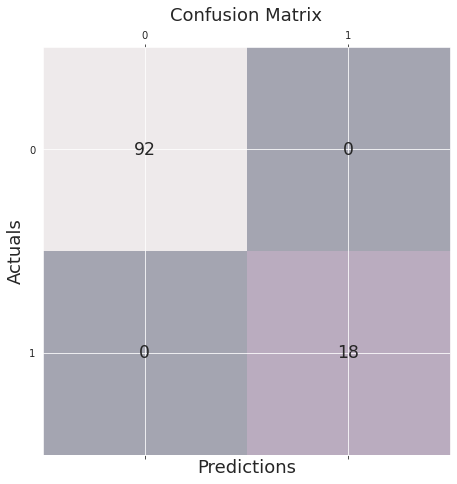

In [78]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix,alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i,j], va ='center', ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [80]:
print(conf_matrix)
print("Accuracy:",accuracy_score(y_test,t1))
print("Precision:",precision_score(y_test,t1))
print("Recall:",recall_score(y_test,t1))
print("F1-score:",f1_score(y_test,t1))

[[92  0]
 [ 0 18]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


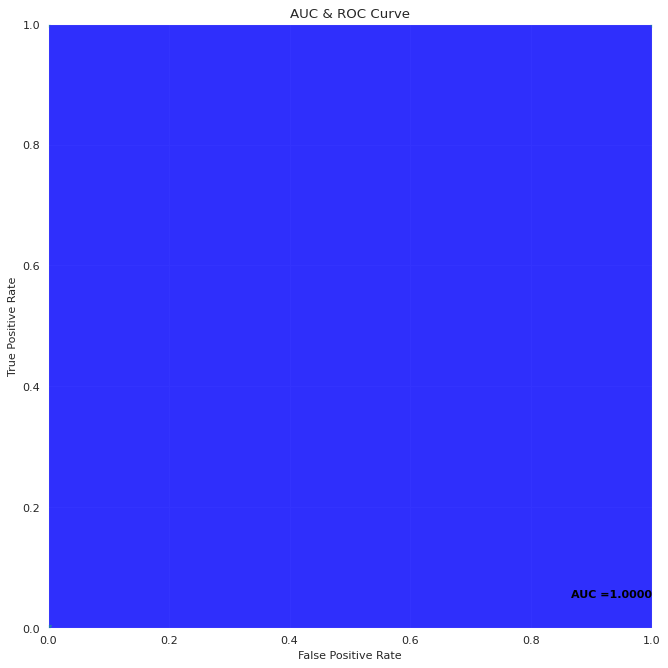

In [81]:
auc = metrics.roc_auc_score(y_test,t1)

fpr,tpr,thresholds = metrics.roc_curve(y_test,t1)

plt.figure(figsize = (12,10),dpi=80)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(fpr,tpr,'v')
plt.fill_between(fpr,tpr,facecolor = 'blue',alpha=0.8)
plt.text(1,0.05, 'AUC =%0.4f' % auc, ha='right', fontsize =10, weight ='bold' , color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [82]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.7 MB/s 
     |████████████████████████████████| 51 kB 565 kB/s 
     |████████████████████████████████| 824 kB 50.8 MB/s 
     |████████████████████████████████| 133 kB 53.2 MB/s 
     |████████████████████████████████| 547 kB 45.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=21e3af06fd7aa6319c618b5446f5fe7faa94f7a5e63189b3a2a92611c946a315
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=8884f5102a859c99be8e36e877d3ebf56a4068dd72fbcd7540a58ca8cd230798
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [83]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey" : "PQBr9MBF7mFuSh2VVLfOE-liIA04VH-h5VEk8EfjFIuw"
}

client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [84]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [85]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 48a743e2-399c-4c37-93fb-e7412163309b


In [86]:
client.set.default_space(space_uid)

'SUCCESS'

In [87]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [88]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [89]:
model_details = client.repository.store_model(model = rand_mod, meta_props = {
    client.repository.ModelMetaNames.NAME:"rainfall",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
})
model_id = client.repository.get_model_id(model_details)

In [90]:
model_id

'319d55e3-1471-48f0-ae4d-cb015909b557'

In [91]:
X_train_scaled[0]

array([0.0720339 , 0.23529412, 0.04878049, 0.81034483, 0.44578313,
       0.5994898 , 0.52706553, 0.0167364 , 0.        , 0.        ])

In [92]:
rand_mod.predict([[5.19157088e-01, 5.39083558e-04, 3.25581395e-01, 1.53846154e-02,
       6.96969697e-01, 6.80000000e-01, 3.20338983e-01, 3.19218241e-01,
       5.19305019e-01, 0.00000000e+00]])

array([0])